# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

## Load the data into a DataFrame
# pd.read_csv()
df = pd.read_csv("/Users/russellsasaki/Downloads/Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [3]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

In [4]:
# Remove $ from certain columns
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [5]:
mystring = "$500"
mystring[1:]

'500'

In [6]:
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [7]:
# Drop or replace bad values
df.dropna(inplace=True)


# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)


In [8]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)


dates = dates.agg({"Date": [np.min, np.max]})
dates.columns=[''.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
lower_cutoff=pd.Timestamp('20150101')
upper_cutoff=pd.Timestamp('20151231')

mask = (dates["Dateamin"] < lower_cutoff) & (dates['Dateamax'] 
                                              > upper_cutoff)

good_stores = dates[mask]["Store Number"]

In [9]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [21]:
# Margin and Price per liter
df['Margin']= (df['State Bottle Retail']*df['Bottles Sold'])-(df['State Bottle Cost']* df['Bottles Sold'])
df['Price per Liter']= df['Sale (Dollars)']/ df['Volume Sold (Liters)']
df['Price per Bottle']=df['Sale (Dollars)']/df['Bottles Sold']
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter,Price per Bottle
22111,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,35,43127,1000,9.50,14.25,36,513.00,36.0,9.51,171.00,14.25,14.25
47659,2015-01-08,2106,CEDAR FALLS,50613,7,1022100,410,88296,750,27.00,40.50,12,486.00,9.0,2.38,162.00,54.00,40.50
65214,2015-01-08,2106,CEDAR FALLS,50613,7,1062310,259,43026,750,5.78,8.67,12,104.04,9.0,2.38,34.68,11.56,8.67
66346,2015-01-08,2106,CEDAR FALLS,50613,7,1081200,305,73055,750,12.50,18.75,12,225.00,9.0,2.38,75.00,25.00,18.75
80570,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,434,46351,1000,4.34,6.51,12,78.12,12.0,3.17,26.04,6.51,6.51


In [40]:
##### Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number", 'Zip Code', 'City','County Number', 'Bottles Sold', 'Price per Bottle', 'Margin'], as_index=False)

sales = sales.agg({ "Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Price per Liter": np.mean
                   })
# Collapse the column indice
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns

# Quick check
sales.head()


,Store Number,Zip Code,City,County Number,Bottles Sold,Price per Bottle,Margin,Price per Liter mean,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,2106,50613,CEDAR FALLS,7,1,4.95,1.65,9.90,4.95,4.95,0.5,0.5
1,2106,50613,CEDAR FALLS,7,1,5.60,1.87,11.20,5.60,5.60,0.5,0.5
2,2106,50613,CEDAR FALLS,7,1,7.20,2.40,14.40,7.20,7.20,0.5,0.5
3,2106,50613,CEDAR FALLS,7,1,7.34,2.45,14.68,7.34,7.34,0.5,0.5
4,2106,50613,CEDAR FALLS,7,1,8.91,2.97,14.85,8.91,8.91,0.6,0.6


In [44]:
zip_stores_margin=sales.groupby(['Zip Code', 'Store Number']).agg({'Bottles Sold':np.sum, 'Margin':np.sum})
zip_stores_margin.sort_values('Margin', axis=0, ascending=False)

,,Bottles Sold,Margin
Zip Code,Store Number,,
50320,2633,26847,155525.51
52402,3385,25017,136077.34
50314,4829,19800,117003.52
50311,3420,18204,102354.06
52240,2512,18271,96560.02
50266,3814,9872,78547.44
52807,3354,12069,72531.69
50010,3524,9738,57485.88
51106,3447,9469,55740.74


In [75]:
zip_stores_margin.sort_values('Bottles Sold', axis=0, ascending=False).head(15)


,,Bottles Sold,Margin
Zip Code,Store Number,,
50320,2633,26847,155525.51
52402,3385,25017,136077.34
50314,4829,19800,117003.52
52240,2512,18271,96560.02
50311,3420,18204,102354.06
52807,3354,12069,72531.69
50266,3814,9872,78547.44
50010,3524,9738,57485.88
51106,3447,9469,55740.74


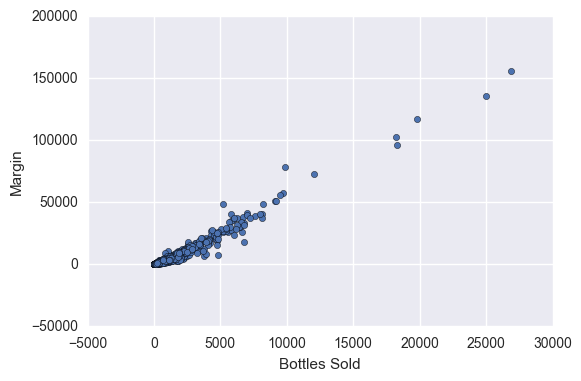

In [76]:
zip_stores_margin.plot(kind='scatter', x='Bottles Sold', y='Margin')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [127]:
import statsmodels.formula.api as smf 
import statsmodels.formula.api as sm 
#smf.ols('wt~ht', data=student_stats).fit().summary()

smf.ols('Margin~Bottles Sold', data=sales).fit().summary()


SyntaxError: invalid syntax (<unknown>, line 1)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models



# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.